In [1]:
import tensorflow as tf
import tensorflow.contrib.timeseries as ts
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
%matplotlib inline

/Users/qp19/anaconda2/envs/oreillytf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read the data
train = pd.read_csv('data/AirPassengersTrain.csv')
test = pd.read_csv('data/AirPassengersTest.csv')

In [3]:
#Transform the data into numpy vectors to feed into TF 
x = train.as_matrix(columns=train.columns[0:1])
y = train.as_matrix(columns=train.columns[1:2])
x = x.reshape((120,))

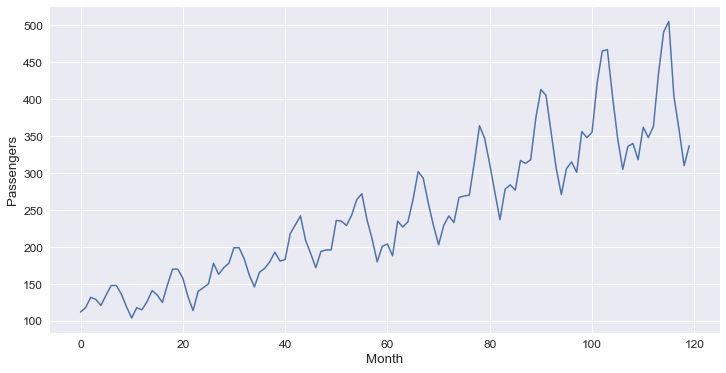

In [4]:
plt.figure(figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Passengers')
_ = plt.plot(x, y)

In [5]:
#Set the data 
data = {
    ts.TrainEvalFeatures.TIMES: x,
    ts.TrainEvalFeatures.VALUES: y
}

reader = NumpyReader(data)

train_input_fn = ts.RandomWindowInputFn(
        reader, batch_size=20, window_size=30)

In [6]:
estimator = ts.StructuralEnsembleRegressor(
      periodicities=[12],
    moving_average_order = 5,
    cycle_num_latent_values = 29,
    autoregressive_order = 5, num_features=1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10708c7d0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpqZSzmu', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


In [7]:
estimator.train(input_fn=train_input_fn, steps=500)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/Users/qp19/anaconda2/envs/oreillytf/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpqZSzmu/model.ckpt.
INFO:tensorflow:loss = 1.8452293231968737, step = 1
INFO:tensorflow:global_step/sec: 5.06745
INFO:tensorflow:loss = -2.2199012162691285, step = 101 (19.734 sec)
INFO:tensorflow:global_step/sec: 6.52005
INFO:tensorflow:loss = -2.6150492450934326, step = 201 (15.339 sec)
INFO:tensorflow:global_step/sec: 6.32396
INFO:tensorflow:loss = -2.8909283577716947, step = 301 (15.811 sec)
INFO:tensorflow:global_step/sec: 6.61557
INFO:tensorflow:loss = -2.9358619757905866, step = 401 (15.116 sec)
INFO:tensorflow:Saving checkpoints for 500 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpqZSzmu/model.ckpt.
INFO:tensorflow:Loss for final step: -2.893553765017372.


In [161]:
eval_input_fn = ts.WholeDatasetInputFn(reader)

In [167]:
evaluation = estimator.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-22:52:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpV_hmBd/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-25-22:52:39
INFO:tensorflow:Saving dict for global step 500: covariance = [[[[33874.80186857]]

  [[25760.84597623]]

  [[24179.06978814]]

  [[18602.19764457]]

  [[16025.27580423]]

  [[13755.33859847]]

  [[11762.93934207]]

  [[11184.01027705]]

  [[10574.17264994]]

  [[10694.3148827 ]]

  [[10298.52717861]]

  [[10066.63310596]]

  [[ 7706.37319108]]

  [[ 3637.77615302]]

  [[ 3025.02185214]]

  [[ 1444.57638382]]

  [[  384.47231244]]

  [[  319.81545319]]

  [[  271.15962014]]

  [[  264.64544674]]

  [[  261.56345855]]

  [[  257.481653

In [156]:
def compute_rmse(a, b):
    rmse =  np.sqrt(np.sum(np.square(a - b)) / len(a))
    return round(rmse,5)

def compute_mae(a, b):
    mae =  np.sqrt(np.sum(np.abs(a - b)) / len(a))
    return round(mae,5)

In [168]:
x_current = evaluation['times'][0]
y_current_actual = evaluation['observed'][0].reshape(-1)
y_current_estimated = evaluation['mean'][0].reshape(-1)

rmse = compute_rmse(y_current_actual, y_current_estimated)
mae = compute_mae(y_current_actual, y_current_estimated)
print("Evaluation RMSE {}".format(rmse))
print("Evaluation MAE {}".format(mae))

Evaluation RMSE 17.91657
Evaluation MAE 3.64967


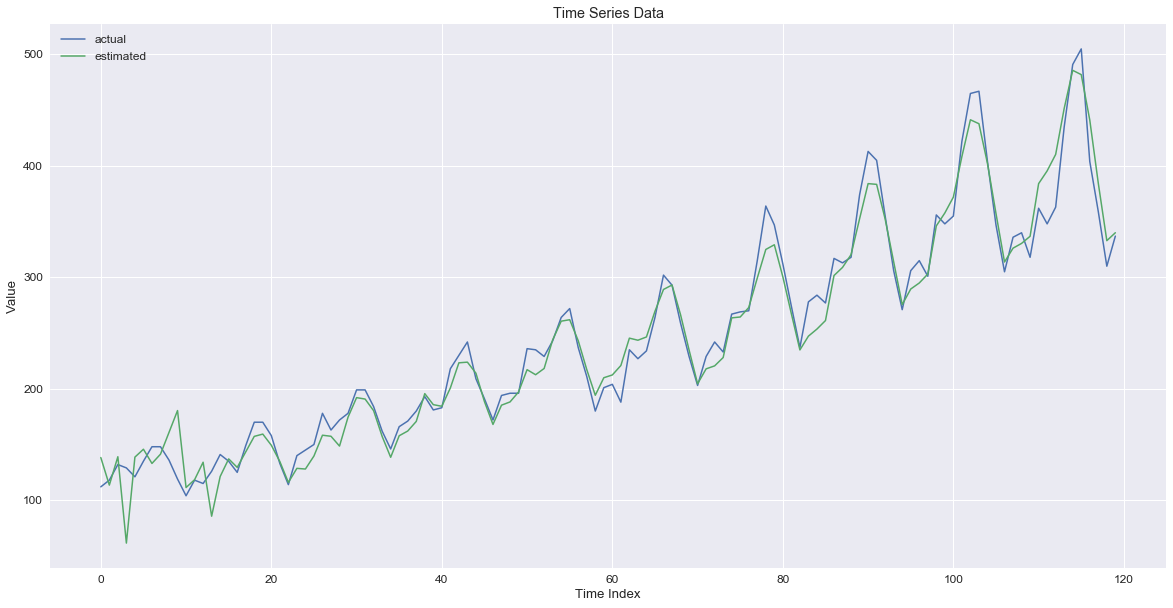

In [169]:
plt.figure(figsize=(20, 10))

plt.title("Time Series Data")
plt.plot(x_current, y_current_actual, label='actual')
plt.plot(x_current, y_current_estimated, label='estimated')
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.legend(loc=2)
plt.show()

In [171]:
#Transform the test data into numpy vectors to feed into TF 
x_test = test.as_matrix(columns=train.columns[0:1])
y_test = test.as_matrix(columns=train.columns[1:2])
x_test = x_test.reshape((24,))

In [172]:
evaluation = estimator.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-23:16:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpV_hmBd/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-25-23:16:33
INFO:tensorflow:Saving dict for global step 500: covariance = [[[[33874.80186857]]

  [[25760.84597623]]

  [[24179.06978814]]

  [[18602.19764457]]

  [[16025.27580423]]

  [[13755.33859847]]

  [[11762.93934207]]

  [[11184.01027705]]

  [[10574.17264994]]

  [[10694.3148827 ]]

  [[10298.52717861]]

  [[10066.63310596]]

  [[ 7706.37319108]]

  [[ 3637.77615302]]

  [[ 3025.02185214]]

  [[ 1444.57638382]]

  [[  384.47231244]]

  [[  319.81545319]]

  [[  271.15962014]]

  [[  264.64544674]]

  [[  261.56345855]]

  [[  257.481653

In [175]:
forecasts = estimator.predict(input_fn=ts.predict_continuation_input_fn(evaluation, steps=24))

In [178]:
forecasts = tuple(forecasts)[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmpV_hmBd/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [179]:
forecasts['mean']

array([[339.36742302],
       [341.22796215],
       [393.63952709],
       [410.39518813],
       [436.59147922],
       [490.32928033],
       [527.47876745],
       [519.1047686 ],
       [460.86237534],
       [402.24222127],
       [347.96875966],
       [356.63477934],
       [356.76057914],
       [362.33725051],
       [421.15005209],
       [445.27250868],
       [477.77569524],
       [534.98513437],
       [571.74443809],
       [559.14225271],
       [493.9242633 ],
       [427.45885388],
       [366.63095444],
       [371.8825402 ]])

In [181]:
forecasts['covariance']

array([[[131.72769157]],

       [[134.9171568 ]],

       [[137.55282818]],

       [[139.18189101]],

       [[139.90902519]],

       [[139.09273205]],

       [[139.0102611 ]],

       [[138.86650347]],

       [[139.18536749]],

       [[140.46052618]],

       [[142.92830456]],

       [[147.15388171]],

       [[159.42866503]],

       [[165.71897961]],

       [[170.67440651]],

       [[173.56649805]],

       [[174.6713589 ]],

       [[173.19495849]],

       [[172.52298502]],

       [[171.86616942]],

       [[172.23247966]],

       [[174.51491014]],

       [[179.11565846]],

       [[186.62044651]]])

In [182]:
y_forecast = forecasts['mean']
rmse =  compute_rmse(y_test, y_forecast)
mae =  compute_mae(y_test, y_forecast)



In [183]:
rmse

29.51968

In [184]:
mae

4.80267

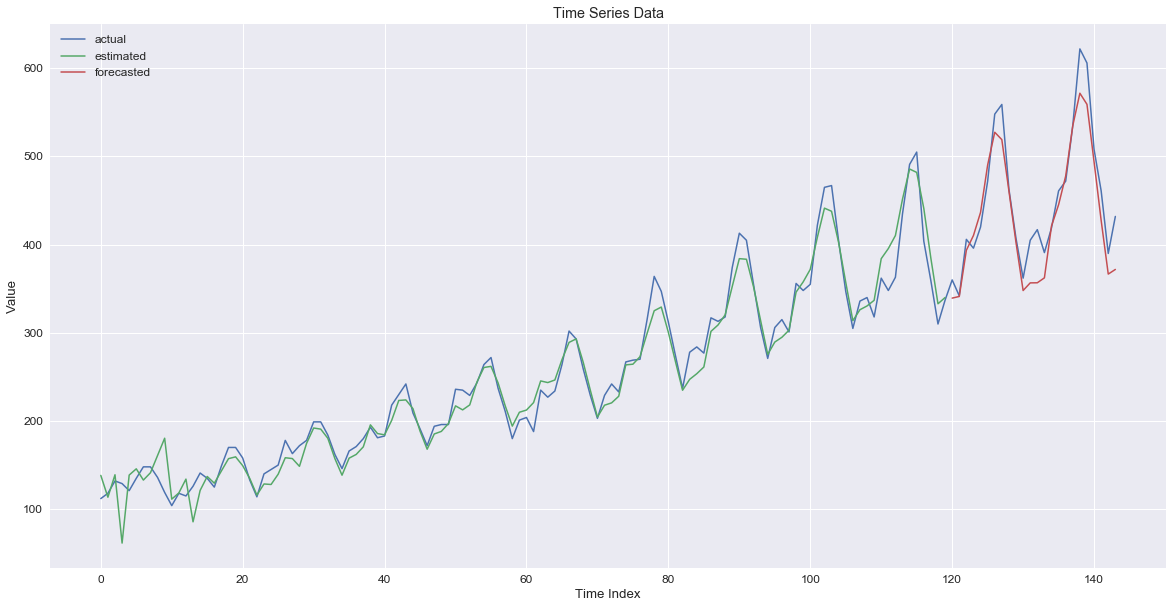

In [192]:
x_all = np.concatenate( (x_current, x_test) , axis=0)
y_actual_all = np.concatenate((y_current_actual, y_test.reshape((24,))), axis=0)

plt.close('all')
plt.figure(figsize=(20, 10))

plt.title("Time Series Data")
plt.plot(x_all, y_actual_all, label='actual')
plt.plot(x_current, y_current_estimated, label='estimated')
plt.plot(x_test, y_forecast, label='forecasted')
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.legend(loc=2)
plt.show()